<a href="https://colab.research.google.com/github/WaWa-0741/colab_projects/blob/main/hw0530_wallace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk

nltk.download("popular")
nltk.download("all-corpora")
nltk.download("punkt")
#每次都是要下載

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
#每次都要用
from google.colab import drive
drive.mount('/content/drive')
#允許讀你的google 硬碟

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls '/content/drive/MyDrive/Colab'
#條列你的文本

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'Argument Essay outline _ first draft _ We should wash our clothes less often_Zozo.txt'
'Argument final drat_Wallace_511061133_20240520.txt'
'Argument First Draft_Ruby.txt'
'Cancel culture _Wallace_511061133_20240311_V2.txt'
'Cause and Effect final drift_Wallace_511061133_V1.txt'
'Comparison and  Contrast Final Draft_Wallace_511061133_20240422_V1.txt'
'Definition final draft_Wallace_511061133.txt'


In [ ]:
#每次都要用
import nltk

from nltk.corpus import PlaintextCorpusReader

corpus_root = '/content/drive/MyDrive/Colab' # 文本的路徑 File Path
wordlists = PlaintextCorpusReader(corpus_root, '.*') # .* => find all files, .txt => 只能讀txt檔

books = wordlists.fileids()# wordlists可改為自己想要的名稱， 類似abc
print(books)

['Argument Essay outline _ first draft _ We should wash our clothes less often_Zozo.txt', 'Argument First Draft_Ruby.txt', 'Argument final drat_Wallace_511061133_20240520.txt', 'Cancel culture _Wallace_511061133_20240311_V2.txt', 'Cause and Effect final drift_Wallace_511061133_V1.txt', 'Comparison and  Contrast Final Draft_Wallace_511061133_20240422_V1.txt', 'Definition final draft_Wallace_511061133.txt']


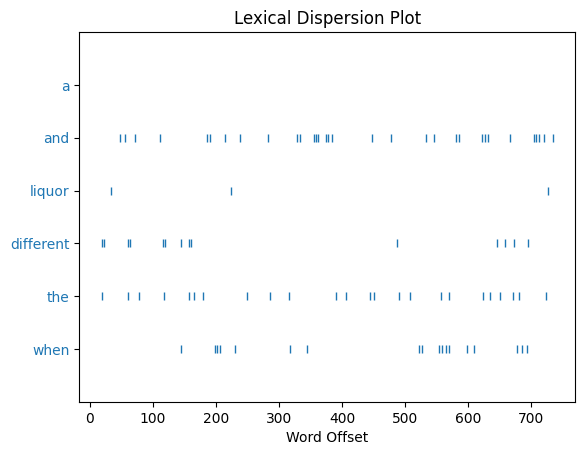

In [ ]:
#詞彙分布圖

import nltk
testText = wordlists.words('Comparison and  Contrast Final Draft_Wallace_511061133_20240422_V1.txt')
single = nltk.text.Text(testText)

findList = ["when","the","different","liquor","and","a"]
single.dispersion_plot(findList)

In [ ]:
# 使用 ConditionalFreqDist()
# 在多個文本中計算特定字詞個數

books = wordlists.fileids()

cfd = nltk.ConditionalFreqDist((fileid, word)
    for fileid in books
    for word in wordlists.words(fileid)
    )

findList = ['can', 'could', 'may', 'might', 'must', 'will', 'shall', 'should','and']
cfd.tabulate(conditions=books, samples=findList)


                                                                                         can  could    may  might   must   will  shall should    and 
Argument Essay outline _ first draft _ We should wash our clothes less often_Zozo.txt      7      0      1      0      2      0      0      0     20 
                                                        Argument First Draft_Ruby.txt      1      1      0      0      0      0      0      0     22 
                                   Argument final drat_Wallace_511061133_20240520.txt      1      4      0      0      0      4      0      4     16 
                                    Cancel culture _Wallace_511061133_20240311_V2.txt      2      9      0      0      0      2      0      3     24 
                                Cause and Effect final drift_Wallace_511061133_V1.txt      7      6      0      0      0      0      0      0     31 
               Comparison and  Contrast Final Draft_Wallace_511061133_20240422_V1.txt      7      6 

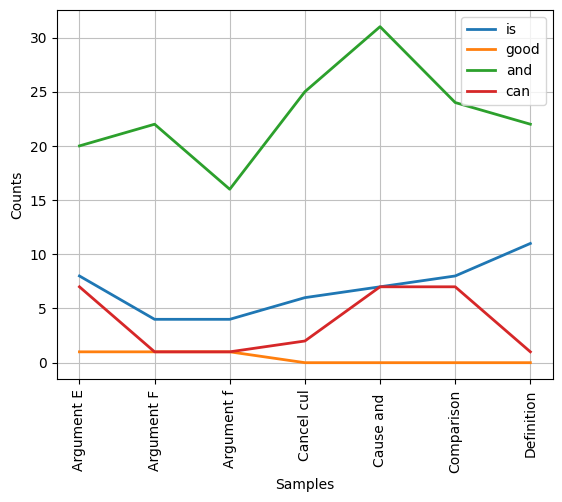

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:10]) # [:10]取至前十位字元
    for fileid in wordlists.fileids() # 取出各個文檔
    for w in wordlists.words(fileid)  # 所有文本的字詞
    for target in ['can', 'and', 'is', 'good'] # 篩選字詞
    if w.lower() == target) # w.lower().startswith(target)  # 字詞+er也能納入計算
cfd.plot()

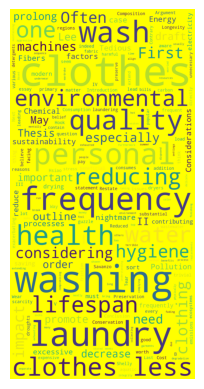

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# doc: https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html
file_text= open('/content/drive/MyDrive/Colab/Argument Essay outline _ first draft _ We should wash our clothes less often_Zozo.txt','r').read()

# background_color 背景顏色
# width 寬
# height 高
# margin 圖片邊緣
# max_font_size 設定文字中最大的大小是多少
# min_font_size
# max_words  文字雲顯示最大詞數
# font_path="/tmp/DFFT_C7.ttc", #設置字體
temp = WordCloud(
    background_color="yellow",
    width=1000,
    height=2000,
    margin=20,
).generate(file_text)
plt.imshow(temp)
plt.axis("off")
plt.show()


In [ ]:
from wordcloud import STOPWORDS
print(STOPWORDS)

{'both', "hasn't", 'once', 'against', 'else', 'k', "we'll", "weren't", 'other', "there's", 'has', 'their', 'by', "haven't", 'some', 'at', "they'll", "i've", "they're", 'here', "they've", 'that', "she'd", "wasn't", 'www', 'over', 'shall', 'himself', 'in', 'her', 'they', 'while', 'few', 'ought', 'them', 'do', 'this', 'to', "why's", "it's", 'these', "wouldn't", 'from', 'have', 'http', 'but', 'the', 'me', 'him', "let's", 'of', 'any', 'am', 'between', 'can', 'get', 'who', 'it', "he's", 'more', 'until', 'just', 'above', 'as', 'below', 'themselves', 'further', 'cannot', 'was', 'during', 'own', 'same', 'whom', 'however', "aren't", 'its', 'again', "we'd", 'also', 'she', 'is', 'up', "we've", 'yourself', 'does', "couldn't", 'doing', "i'd", 'should', 'through', 'like', 'such', 'ours', 'hers', 'why', 'therefore', 'so', "here's", 'he', 'herself', 'be', 'into', 'having', 'each', 'otherwise', "i'm", "where's", 'had', 'we', 'when', 'i', 'with', 'my', 'a', 'which', 'you', 'would', 'theirs', "you'd", "sh

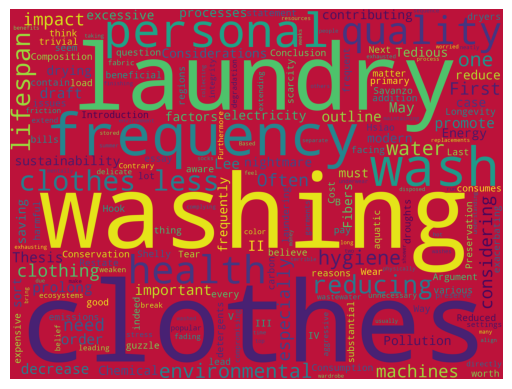

In [ ]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

file_text= open('/content/drive/MyDrive/Colab/Argument Essay outline _ first draft _ We should wash our clothes less often_Zozo.txt','r').read()

#STOPWORDS停用字詞
from wordcloud import STOPWORDS
stop=["people",'culture','wash']+list(STOPWORDS)

temp = WordCloud(
    background_color="#BC123A",# colorHex
    width=2000,
    height=1500,
    margin=5,
).generate(file_text)
plt.imshow(temp)
plt.axis("off")
plt.show()